In [121]:
import warnings #Used to ignore the warning given as output of the code.
warnings.filterwarnings('ignore')

import numpy as np # Basic libraries of python for numeric and dataframe computations.
import pandas as pd

import matplotlib.pyplot as plt #Basic library for data visualization.
import seaborn as sns #Slightly advanced library for data visualization

from sklearn.metrics.pairwise import cosine_similarity #To compute the cosine similarity between two vectors.
from collections import defaultdict #A dictionary output that does not raise a key error

from sklearn.metrics import mean_squared_error # A performance metrics in sklearn.

from sklearn.preprocessing import LabelEncoder #To do label encoding

In [122]:
count_df = pd.read_csv('C:/MITADSC/Capstone/count_data.csv')
song_df = pd.read_csv('C:/MITADSC/Capstone/song_data.csv')

In [123]:
count_df_copy = count_df #copy the data to another dataframe to preserve the orginal
song_df_copy = song_df 

In [124]:
count_df_copy.head(n=10) #see what the first 10 records look like

,Unnamed: 0,user_id,song_id,play_count
0,0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1
5,5,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODDNQT12A6D4F5F7E,5
6,6,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODXRTY12AB0180F3B,1
7,7,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFGUAY12AB017B0A8,1
8,8,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFRQTD12A81C233C0,1
9,9,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOHQWYZ12A6D4FA701,1


In [125]:
song_df_copy.head(n=10) #see what the first 10 records look like

,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0
5,SOZVAPQ12A8C13B63C,"Symphony No. 1 G minor ""Sinfonie Serieuse""/All...",Berwald: Symphonies Nos. 1/2/3/4,David Montgomery,0
6,SOQVRHI12A6D4FB2D7,We Have Got Love,Strictly The Best Vol. 34,Sasha / Turbulence,0
7,SOEYRFT12AB018936C,2 Da Beat Ch'yall,Da Bomb,Kris Kross,1993
8,SOPMIYT12A6D4F851E,Goodbye,Danny Boy,Joseph Locke,0
9,SOJCFMH12A8C13B0C2,Mama_ mama can't you see ?,March to cadence with the US marines,The Sun Harbor's Chorus-Documentary Recordings,0


In [ ]:
#### **Observations and Insights:_____________**

In [126]:
count_df_copy.info() #check the info of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   Unnamed: 0  int64 
 1   user_id     object
 2   song_id     object
 3   play_count  int64 
dtypes: int64(2), object(2)
memory usage: 61.0+ MB


In [127]:
song_df_copy.info() #check the info of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   song_id      1000000 non-null  object
 1   title        999985 non-null   object
 2   release      999995 non-null   object
 3   artist_name  1000000 non-null  object
 4   year         1000000 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 38.1+ MB


In [128]:
combined_df = pd.merge(left = count_df_copy, right = song_df_copy, how='left', left_on='song_id', right_on='song_id').drop_duplicates()
combined_df.head(n=10) #merged the dataframes, dropped duplicates, then checked the results to see if they made sense

,Unnamed: 0,user_id,song_id,play_count,title,release,artist_name,year
0,0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
1,1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007
4,3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005
5,4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999
6,5,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODDNQT12A6D4F5F7E,5,Apuesta Por El Rock 'N' Roll,Antología Audiovisual,Héroes del Silencio,2007
7,6,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODXRTY12AB0180F3B,1,Paper Gangsta,The Fame Monster,Lady GaGa,2008
8,7,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFGUAY12AB017B0A8,1,Stacked Actors,There Is Nothing Left To Lose,Foo Fighters,1999
9,8,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFRQTD12A81C233C0,1,Sehr kosmisch,Musik von Harmonia,Harmonia,0
10,9,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOHQWYZ12A6D4FA701,1,Heaven's gonna burn your eyes,Hôtel Costes 7 by Stéphane Pompougnac,Thievery Corporation feat. Emiliana Torrini,2002


In [129]:
combined_df.drop('Unnamed: 0', 1, inplace=True) #dropped the Unnamed:  0 column

In [130]:
le = LabelEncoder() #initialize the label encoder and using it on user_id and song_id
combined_df['user_id'] = le.fit_transform(combined_df['user_id'])
combined_df['song_id'] = le.fit_transform(combined_df['song_id'])
combined_df.head() #checking the results to see they make sense

,user_id,song_id,play_count,title,release,artist_name,year
0,54961,153,1,The Cove,Thicker Than Water,Jack Johnson,0
1,54961,413,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,54961,736,1,Stronger,Graduation,Kanye West,2007
4,54961,750,1,Constellations,In Between Dreams,Jack Johnson,2005
5,54961,1188,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999


In [131]:
# Get the column containing the users
users = combined_df.user_id
# Create a dictionary from users to their number of songs
play_count = dict()
for user in users:
    # If we already have the user, just add 1 to their play count
    if user in play_count:
        play_count[user] += 1
    # Otherwise, set their play count to 1
    else:
        play_count[user] = 1    

In [132]:
PLAYS_CUTOFF = 90
remove_users = []
for user, num_play_count in play_count.items():
    if num_play_count < PLAYS_CUTOFF:
        remove_users.append(user)
combined_df = combined_df.loc[~combined_df.user_id.isin(remove_users)]

In [133]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 467139 entries, 205 to 2086703
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   user_id      467139 non-null  int32 
 1   song_id      467139 non-null  int32 
 2   play_count   467139 non-null  int64 
 3   title        467139 non-null  object
 4   release      467139 non-null  object
 5   artist_name  467139 non-null  object
 6   year         467139 non-null  int64 
dtypes: int32(2), int64(2), object(3)
memory usage: 24.9+ MB


In [134]:
# Get the column containing the songs
songs = combined_df.song_id
# Create a dictionary from songs to their number of users
play_count = dict()
for song in songs:
    # If we already have the song, just add 1 to their rating count
    if song in play_count:
        play_count[song] += 1
    # Otherwise, set their rating count to 1
    else:
        play_count[song] = 1    

In [135]:
# We want our song to be listened by atleast 120 users to be considered
RATINGS_CUTOFF = 120
remove_songs = []
for song, num_play_count in play_count.items():
    if num_play_count < RATINGS_CUTOFF:
        remove_songs.append(song)
df_final= combined_df.loc[~combined_df.song_id.isin(remove_songs)]

In [136]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152833 entries, 209 to 2086699
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   user_id      152833 non-null  int32 
 1   song_id      152833 non-null  int32 
 2   play_count   152833 non-null  int64 
 3   title        152833 non-null  object
 4   release      152833 non-null  object
 5   artist_name  152833 non-null  object
 6   year         152833 non-null  int64 
dtypes: int32(2), int64(2), object(3)
memory usage: 8.2+ MB


In [137]:
# Drop records with play_count more than(>) 5
df_final = df_final[df_final['play_count'] <= 5]

In [138]:
# Check the shape of the data
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138301 entries, 209 to 2086699
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   user_id      138301 non-null  int32 
 1   song_id      138301 non-null  int32 
 2   play_count   138301 non-null  int64 
 3   title        138301 non-null  object
 4   release      138301 non-null  object
 5   artist_name  138301 non-null  object
 6   year         138301 non-null  int64 
dtypes: int32(2), int64(2), object(3)
memory usage: 7.4+ MB


In [139]:
# Display total number of unique user_id
df_final['user_id'].nunique()

3337

In [140]:
# Display total number of unique song_id
df_final['song_id'].nunique()

620

In [141]:
# Display total number of unique artists
df_final['artist_name'].nunique()

247

In [142]:
#most interacted songs
df_final['song_id'].value_counts()

8582    1602
6293    1264
3567     982
4270     960
1286     920
        ... 
8324     103
7747      99
4831      98
2796      92
8801      87
Name: song_id, Length: 620, dtype: int64

In [143]:
#most interacted users
df_final['user_id'].value_counts()

61472    282
15733    240
37049    237
9570     204
10763    199
        ... 
33657      1
17961      1
14439      1
19776      1
45476      1
Name: user_id, Length: 3337, dtype: int64

In [147]:
count_songs = df_final.groupby('year').count()['title']
count = pd.DataFrame(count_songs)
count.drop(count.index[0], inplace=True)
count.tail()

,title
year,
2006,9004
2007,15623
2008,16626
2009,18554
2010,5307


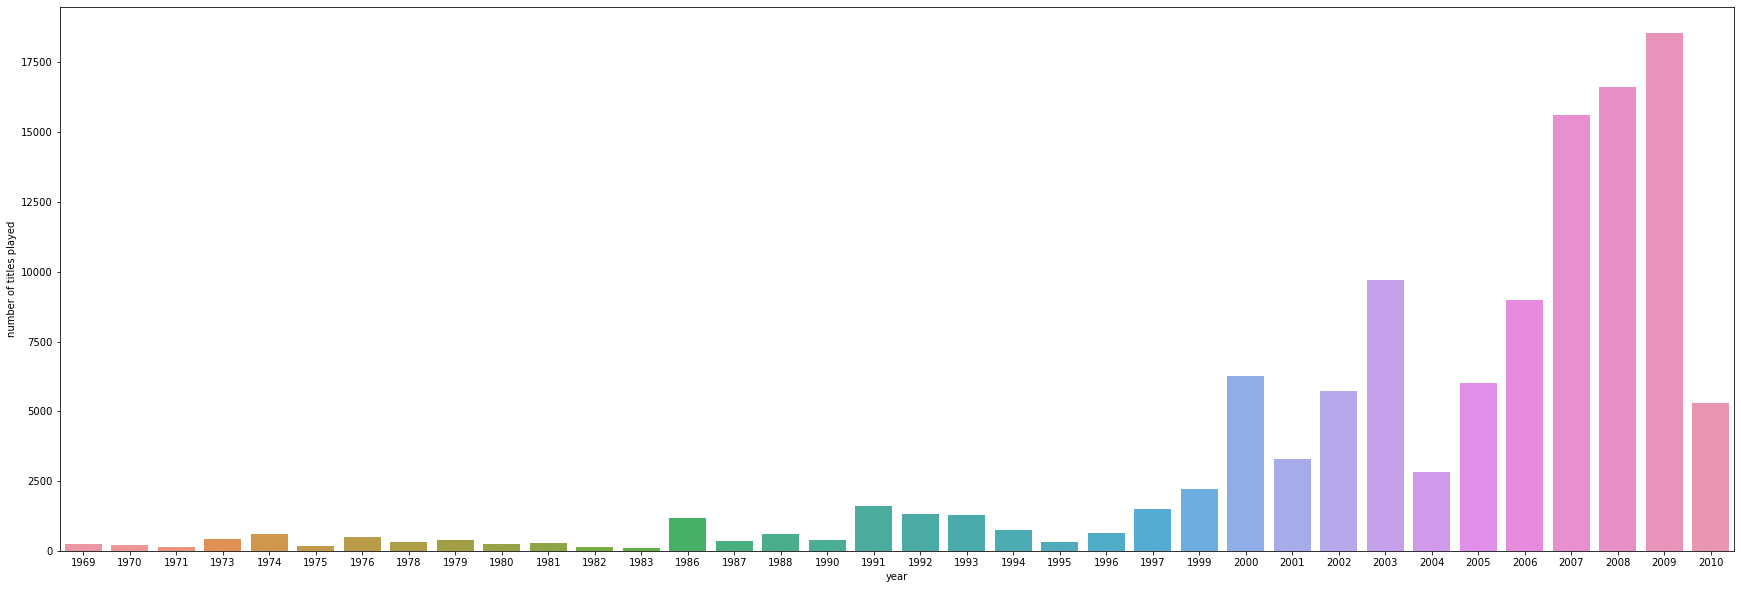

In [145]:
plt.figure(figsize=(30,10))
sns.barplot(x = count.index,
            y = 'title',
            data = count,
            estimator = np.median)
plt.ylabel('number of titles played') 
# Show the plot
plt.show()